# Introduction to statistical models

In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as ss

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Goals of this lecture

- From **descriptive statistics** to **statistical models**. 
- Introducing the **linear model**.  
- Key **assumptions** of linear regression.  

## From descriptions to statistical models

### Describing our data

So far, we've discussed approaches to *describing* features of our data:

- **Central tendency** (univariate): `mean`, `median`, `mode`.
- **Variability** (univariate): `std`, `range`.  
- **Correlation** (bivariate): `corr`.  

But often, we want to do more than simply *describe* data––we want to **model** it.

### Modeling our data

> A **statistical model** is a mathematical model representing a "data-generating process".

- **Data-generating process** = how did our data come to be?  
   - We can't observe this directly, but we can **estimate** it.
- Usually involves learning a *relationship* (or **function**) between different variables (e.g., $X$ and $Y$).  
- ["All models are wrong, but some are useful"](https://en.wikipedia.org/wiki/All_models_are_wrong).  


### Why models?

> Statistical models help us **understand** our data, and also **predict** new data.

Broadly, two "paradigms" of using statistical models:

1. **Prediction**: try to predict unseen values of $Y$, given $X$.  
1. **Inference**: try to understand how $X$ relates to $Y$, test hypotheses, etc.

Both are very useful, and also *compatible*.

### Prediction vs. inference

> “It’s tough to make predictions, especially about the future” - Yogi Berra

Prediction and inference can be done on the *same dataset*––it's mostly about your goals.

|Topic|Prediction|Inference|
|-------|----------------|-----------|
|Loan repayment|Will this person repay a loan?|How does education quality affect loan repayment?|
|Road behavior|Will this vehicle suddenly merge left?|Which features of a driver correlate with sudden, erratic movements?|
|Advertising|How much can we expect to earn this quarter?|Which kinds of ads are most successful?|



### Models encode *functions*

> A statistical model often represents a **function** mapping from $X$ (inputs) to $Y$ (outputs).

 $\Large Y = f(X, \beta) + \epsilon$
 
 - $Y$: what we want to predict (outputs).
 - $X$: the features we will use to predict $Y$ (inputs).  
 - $\beta$: the *weights* (or "coefficients") mapping $X$ to $Y$.  
 - $\epsilon$: residual error from the model

### Models aren't perfect

> No model is perfect; all models have some amount of **prediction error**, sometimes called **residuals** (or $\epsilon$).

 ![title](img/models/education.png)
 
 [Figure from *An Introduction to Statistical Learning*](https://www.statlearning.com/).

### Models have *trade-offs*

> In general, [there is often a trade-off](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) between the **flexibility** of a model and the **interpretability** of that model.

- More *flexible* models (e.g., neural networks) can learn more complex functions/relationships, but they are often harder to interpret.  
- Less *flexible* models (e.g., linear regression) have higher "bias", but are often easier to interpret.  

The suitability of each model depends on your **goals**.

### Above all, models are *tools*

- A model is a *map* of the data––not the data itself.  
- [Richard McElreath](https://xcelab.net/rm/) compares models to [golems](https://en.wikipedia.org/wiki/Golem).  
  - Powerful machines that follow their instructions to the *letter*, for better or for worse.  
- They're a powerful part of our toolkit, but the final responsibility always rests with the scientist.

## Introducing the *linear model*

### Linear regression: basics

> The goal of linear regression is to find the **line of best fit** between some variable(s) $X$ and the **continuous** dependent variable $Y$. 

- Assuming a *linear relationship* between inputs $X$ and response $Y$... 
- ...find parameters $\beta$ that minimize **prediction error**. 
- Allows for many predictors, but we'll start with **univariate regression**. 

### The line of "best fit"

> The goal of linear regression is to find the **line of best fit** between some variable(s) $X$ and the dependent variable $Y$. 

/Users/seantrott/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


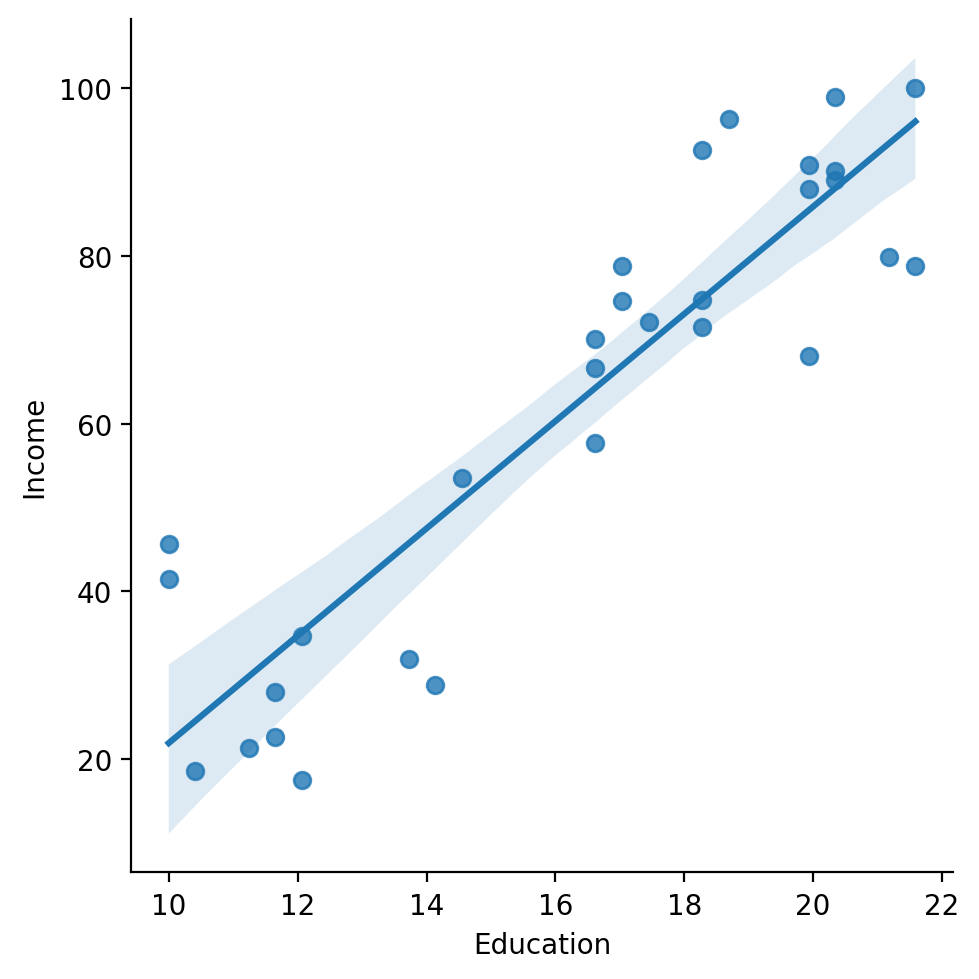

In [3]:
df_income = pd.read_csv("data/models/income.csv")
sns.lmplot(data = df_income, x = "Education", y = "Income")

### The linear equation

$\Large Y = \beta_0 + \beta_1X_1 + \epsilon$

- $\beta_0$, or **intercept**: predicted $\hat{Y}$ when $X_1 = 0$.
- $\beta_1$, or **slope**: predicted increase in $\hat{Y}$ for each 1-unit increase in $X_1$.
   - When $X_1$ is categorical, **slope** (typically) reflects the **difference in means** between categories.
- $\epsilon$, or **error**: assumes normally-distributed "leftover variance".

#### Linear equation in action (no error)

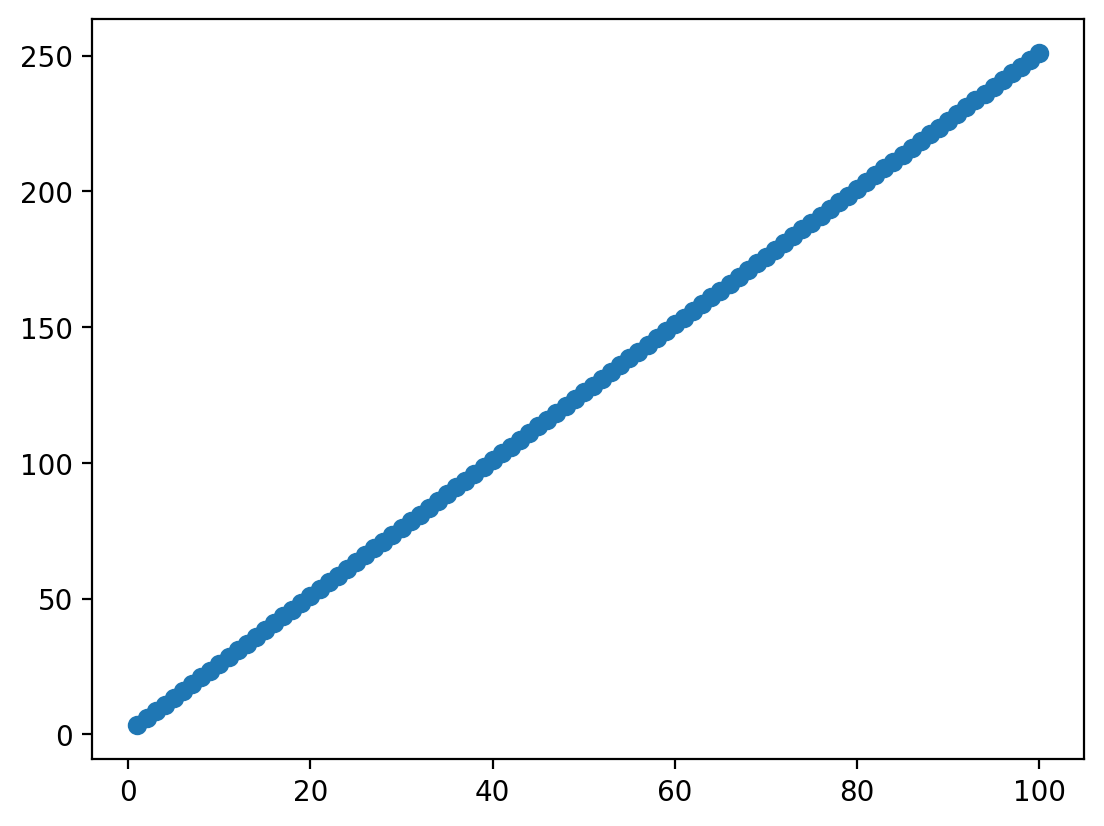

In [4]:
X = np.arange(1, 101) ### Given some inputs X...
beta = 2.5 ### some coefficient relating X to Y
intercept = 1 ### and some intercept
Y = X*beta + intercept ### we can generate data
plot = plt.scatter(X, Y)

#### Linear equation in action (with error)

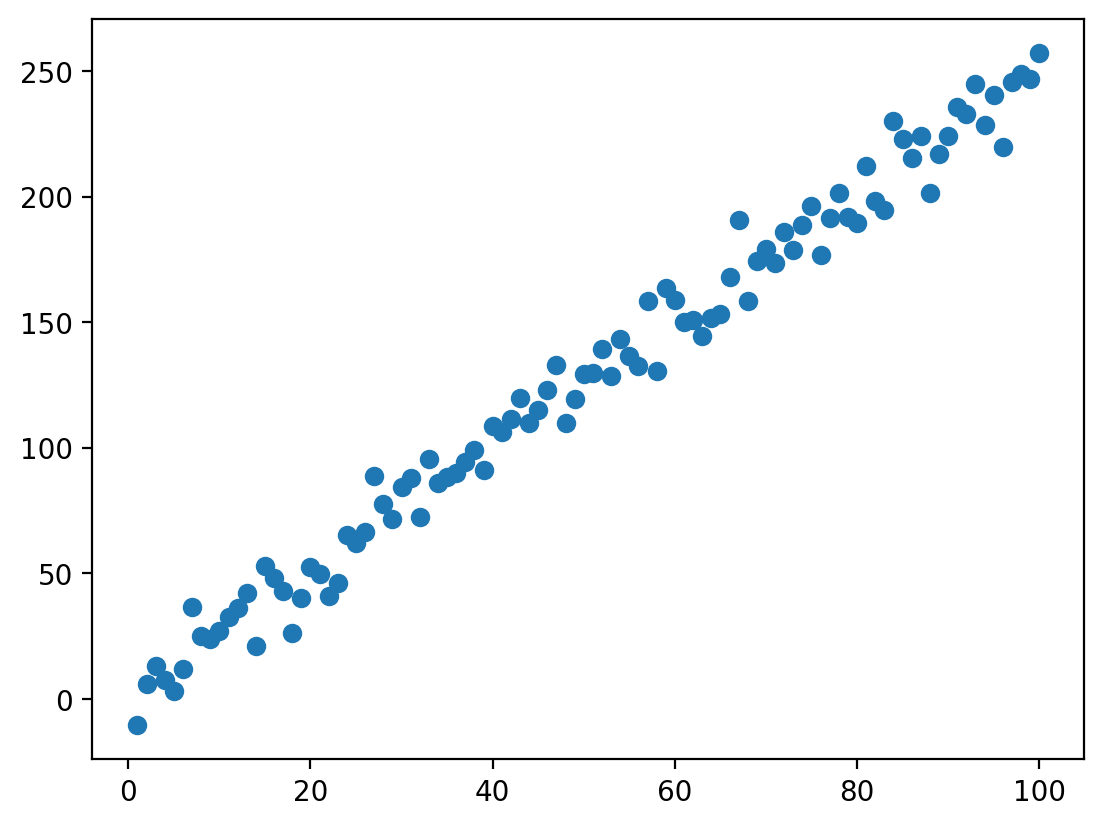

In [5]:
ERROR = np.random.normal(loc = 0, scale = 10, size = 100)
Y = X*beta + intercept + ERROR ### add error now
plot = plt.scatter(X, Y)

#### Check-in: the effect of error

How does changing the `scale` parameter in `np.random.normal` change the amount of error? Why is this?

In [6]:
### Your code here

### Many *possible* lines between $X$ and $Y$

With linear regression, our goal is to **learn** the coefficients mapping $X$ to $Y$:

- $\beta_0$: Intercept. 
- $\beta_1$: Slope.

<Axes: xlabel='Education', ylabel='Income'>

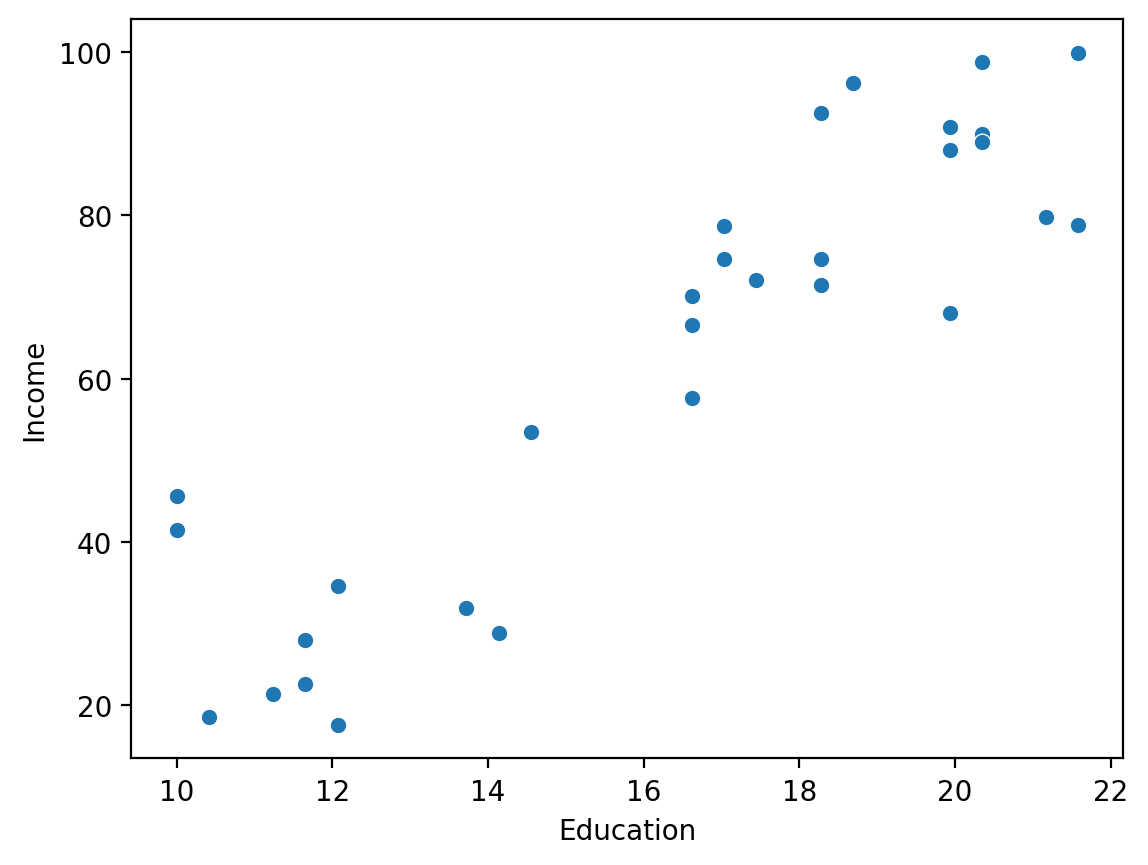

In [7]:
sns.scatterplot(data = df_income, x = "Education", y = "Income")

#### Same slope, different intercept

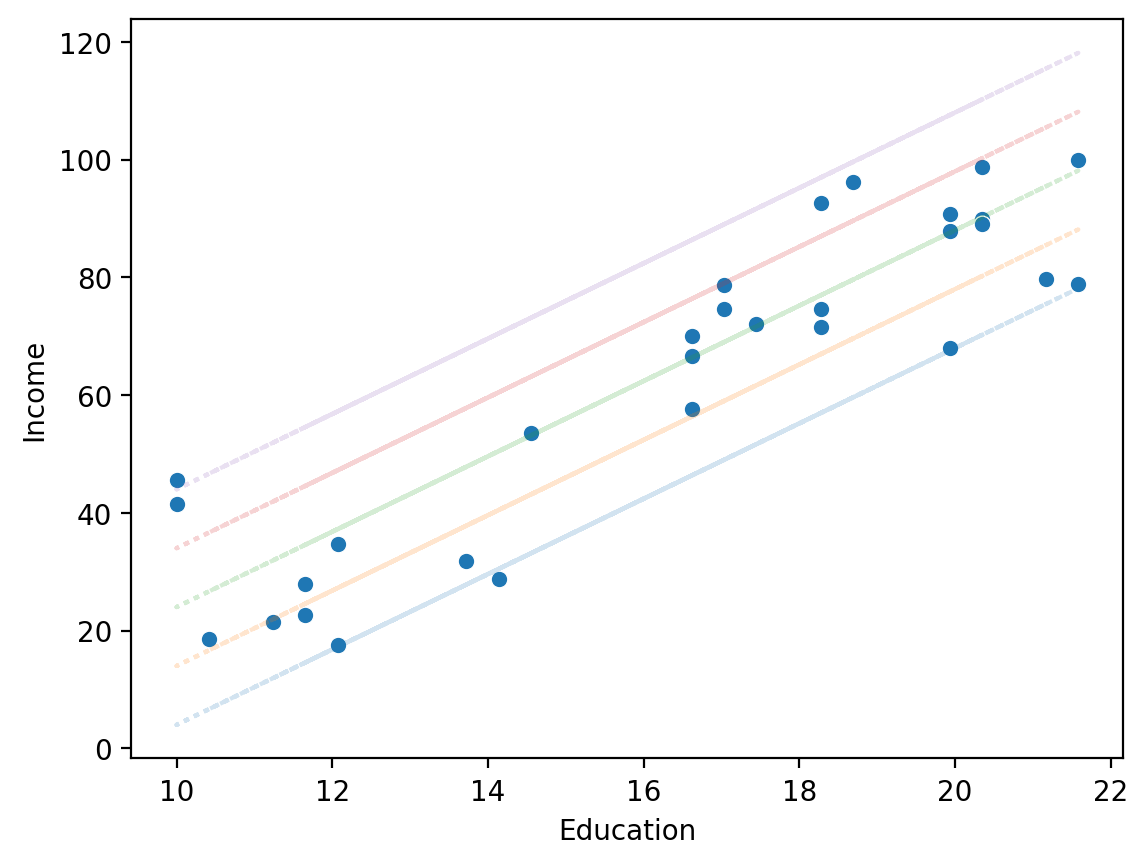

In [8]:
sns.scatterplot(data = df_income, x = "Education", y = "Income")
for intercept in [-60, -50, -40, -30, -20]:
    y_pred = intercept + df_income['Education'] * 6.4
    plt.plot(df_income['Education'], y_pred, alpha = .2, linestyle = "dotted")

#### Same intercept, different slope

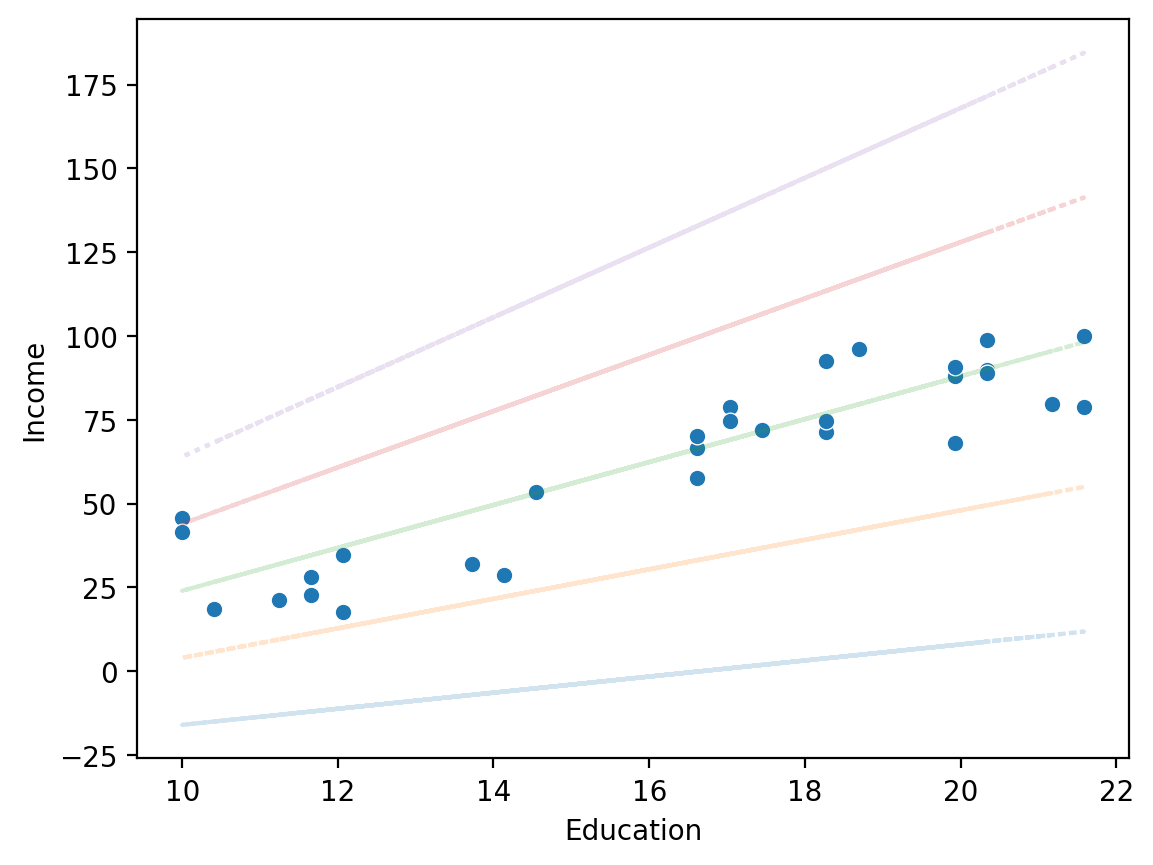

In [9]:
sns.scatterplot(data = df_income, x = "Education", y = "Income")
for slope in [2.4, 4.4, 6.4, 8.4, 10.4]:
    y_pred = -40 + df_income['Education'] * slope
    plt.plot(df_income['Education'], y_pred, alpha = .2, linestyle = "dotted")

### Some lines are better than others.

- We can quantify **quality of fit** by calculating **prediction error** in some way.
- Simple approach: sum of squared deviations (residuals) between predictions $\hat{Y}$ and actual values $Y$. 

 $\Large RSS = \sum_i^N (\hat{y}_i - y_i)^2$
 
**Check-in:** Does this equation remind you of anything?

#### Analogy: $SS_X$ vs. $RSS$

The **sum of squares of X** is used in the **standard deviation** equation, and is defined as:

 - $\Large SS_X = \sum_{i}^{N}(x_i - \mu)^2$

Whereas **RSS** is defined as:

 - $\Large RSS = \sum_i^N (\hat{y}_i - y_i)^2$



### MSE: the *mean squared error*

We can also calculate the **mean squared error** (or **MSE**), i.e., the *average squared deviation* of each data-point $Y_i$ from its predicted value $\hat{Y}_i$.

$\Large MSE = \frac{1}{N}*\sum_i^N (\hat{y}_i - y_i)^2$

#### MSE in action (pt. 1)

Steps:

1. For a range of possible *slopes*, calculate predicted values $\hat{Y}$.
2. Then, calculate **mean squared error** bewteen predicted values and actual values $Y$.

In [10]:
errors = []
SLOPES = [2.4, 4.4, 6.4, 8.4, 10.4]
for slope in SLOPES:
    y_pred = -40 + df_income['Education'] * slope
    mse = (1/len(df_income)) * sum((y_pred - df_income['Income'])**2) ## calculate mse
    errors.append({'slope': slope,
                  'mse': mse})

#### MSE in action (pt. 2)

Now we can ask: which slope $\beta$ had the *lowest* MSE?

<Axes: xlabel='slope', ylabel='mse'>

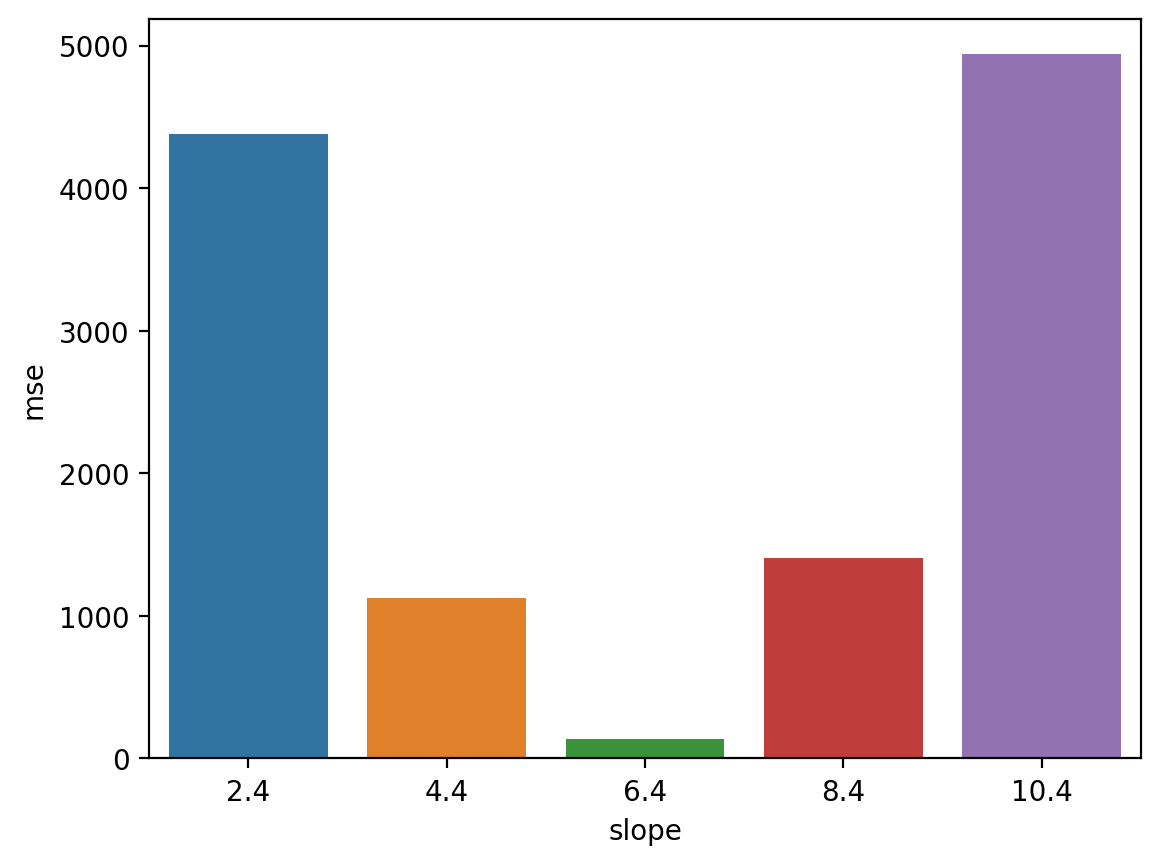

In [11]:
df_errors = pd.DataFrame(errors)
sns.barplot(data = df_errors, x = "slope", y = "mse")

## Key assumptions

- All models have assumptions, linear regression included.  
- Some of these (e.g., homoscedasticity) will make more sense when we discuss measures of **model fit** in more depth.
- For now, high-level summary.

### Assumption 1: Linearity

Linear regression assumes the *function* relating $X$ and $Y$ is **linear**––even if it's not.

/Users/seantrott/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


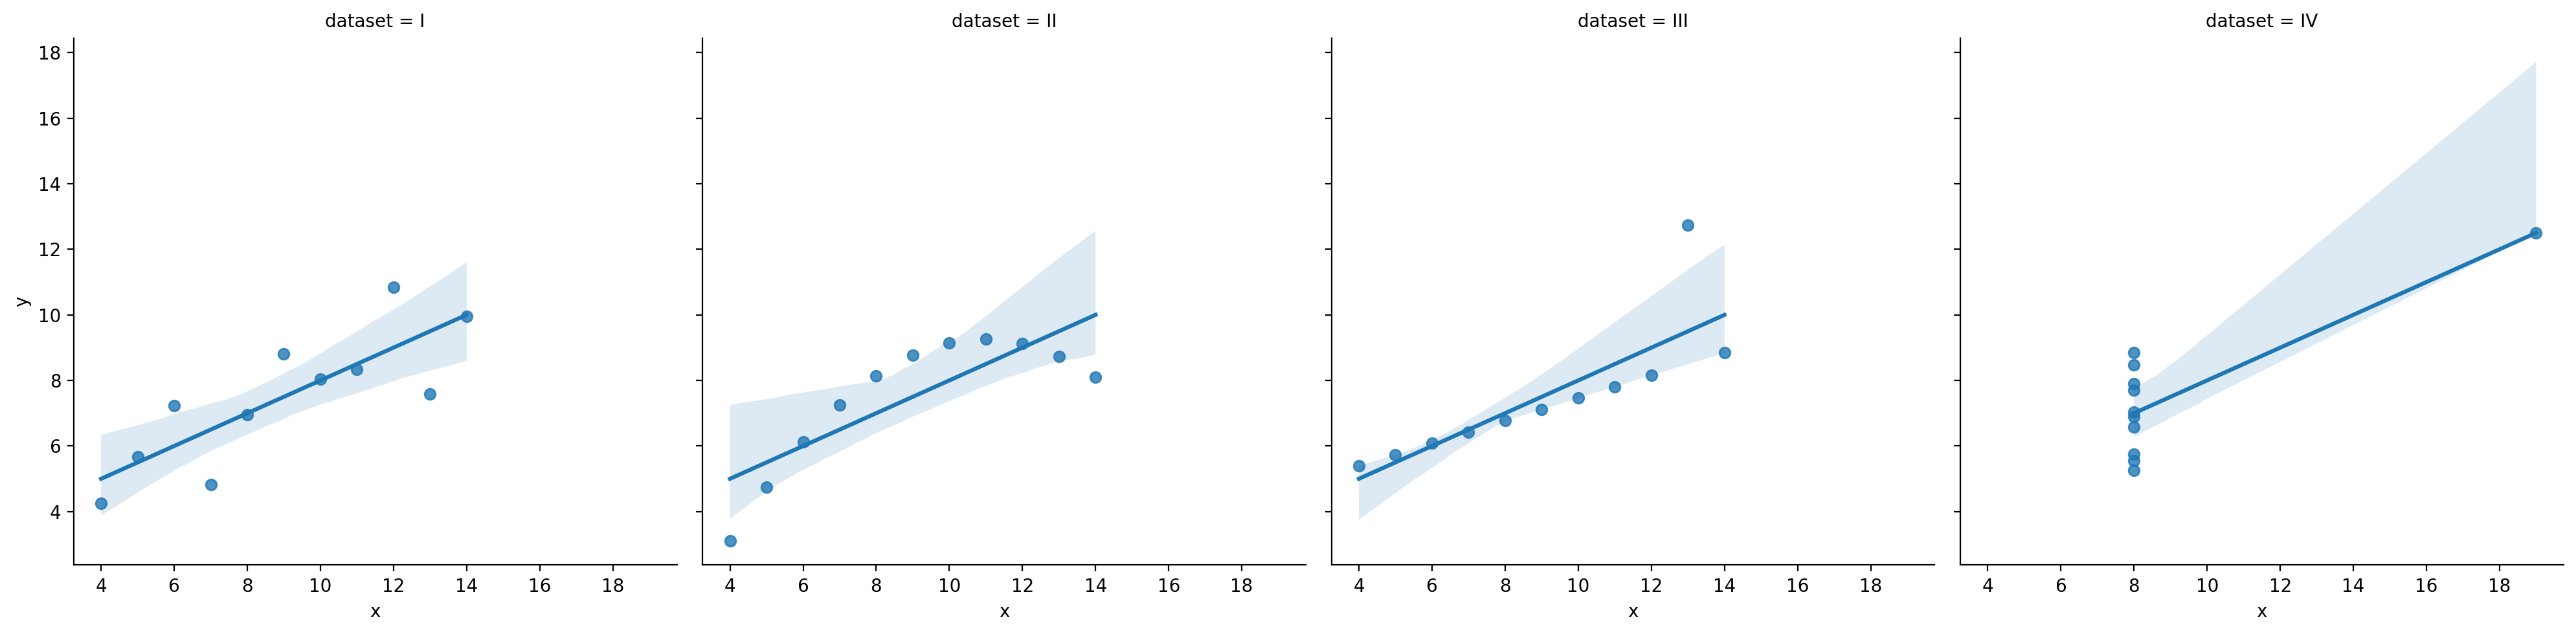

In [12]:
df_anscombe = sns.load_dataset("anscombe")
sns.lmplot(data = df_anscombe, x = "x", y = "y", col = "dataset")

### Assumption 2: Normally-distributed residuals

Linear regression also assumes the **residuals** (i.e., the *prediction errors*) are **normally-distributed**.

- Specifically, many estimates of **prediction error** depend on this assumption. 
- We'll return to this in a later lecture!

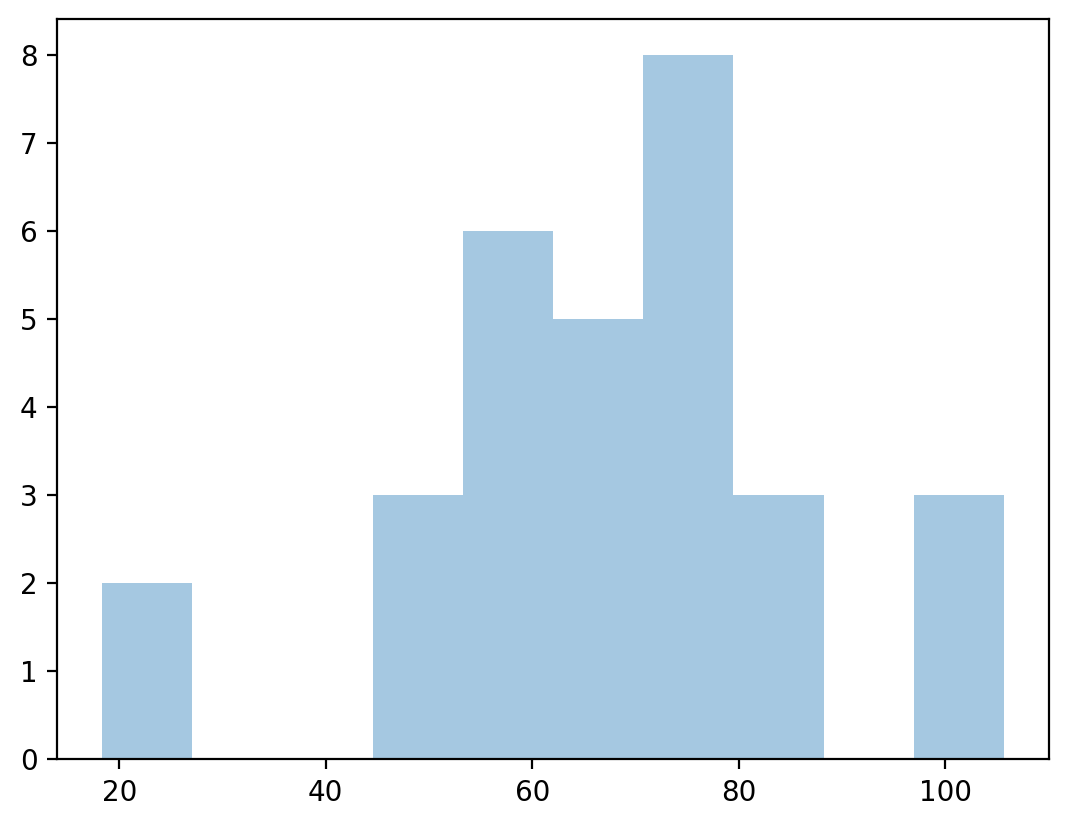

In [13]:
resid = y_pred - df_income['Income'] ## calculate residuals
p = plt.hist(resid, alpha = .4)  ## plot them to see normality?

### Assumption 3: Homoscedasticity

> **Homoscedasticity** means that the residuals are evenly distributed along the regression line.

- The opposite of homoscedasticity is **heteroscedasticity**.  
- Again, this will become very important when we discuss measures of *prediction error*.

#### Heteroscedasticity in action

Heteroscedasticity often (but not always) can be identified by a **funnel-shape**.

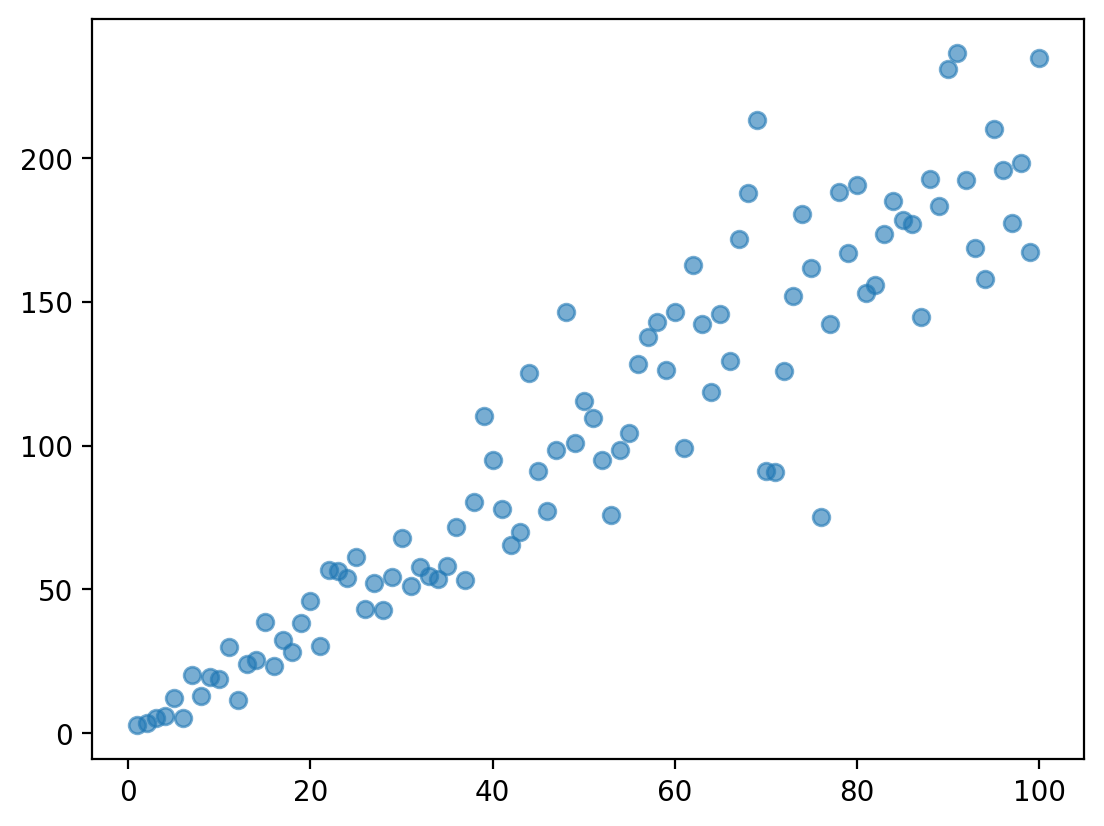

In [14]:
np.random.seed(1)
X = np.arange(1, 101)
y = X *2 + np.random.normal(loc = 0, scale = X/2, size = 100)
plt.scatter(X, y, alpha = .6)

#### Check-in

Does this data display heteroscedasticity? Why or why not?

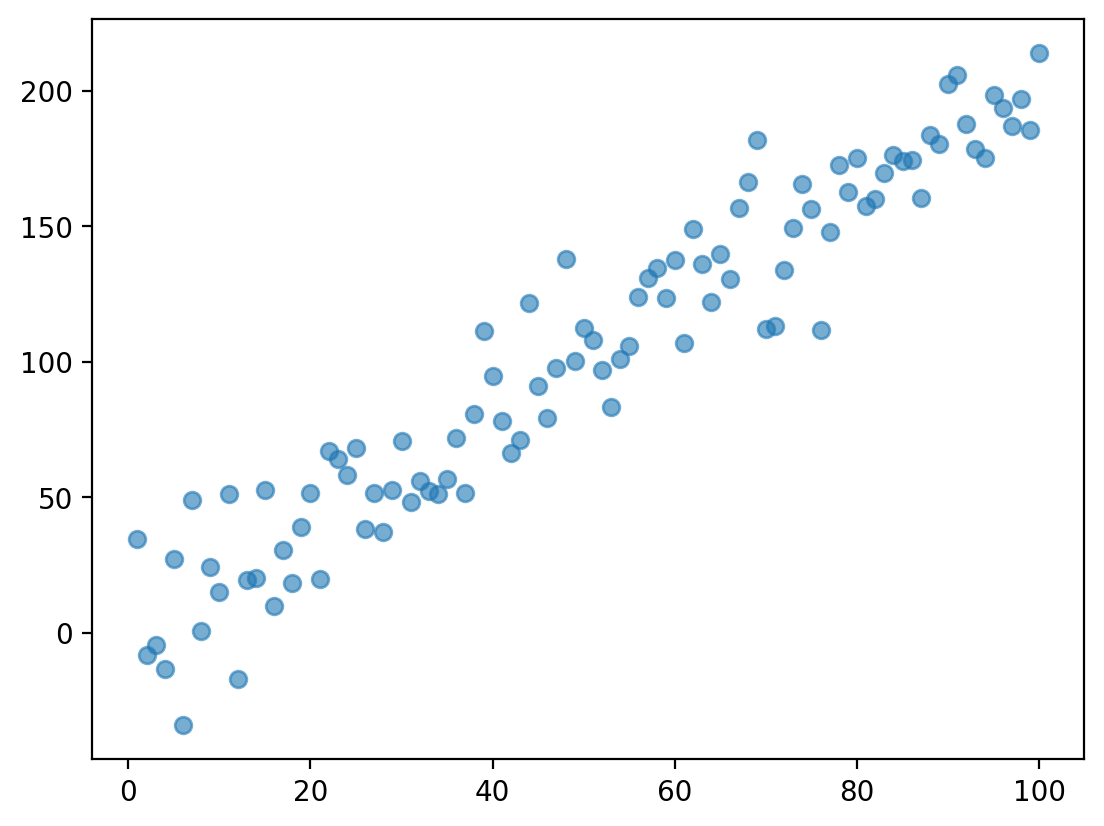

In [15]:
np.random.seed(1)
X = np.arange(1, 101)
y = X *2 + np.random.normal(loc = 0, scale = 20, size = 100)
plt.scatter(X, y, alpha = .6)

#### Check-in

Does this data display heteroscedasticity? Why or why not?

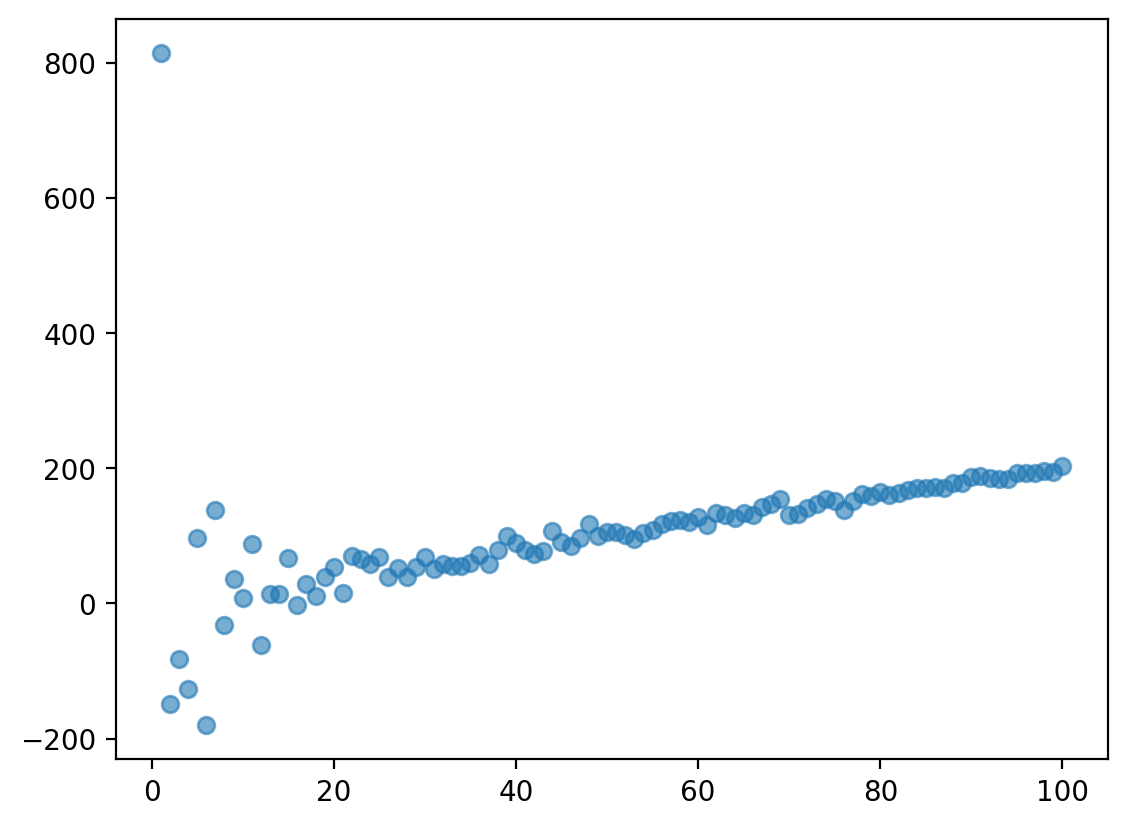

In [16]:
np.random.seed(1)
X = np.arange(1, 101)
y = X *2 + np.random.normal(loc = 0, scale = 500/X, size = 100)
plt.scatter(X, y, alpha = .6)

### Assumption 4: Independence

> [**Independence**](https://en.wikipedia.org/wiki/Independence_(probability_theory)) means that each **event** or *observation* in our dataset was generated by distinct processes. 

- An example of **non-independence** would be multiple observations from the same subject (or country, etc.).  
- Advanced statistical methods control for non-independence using [mixed effects](https://en.wikipedia.org/wiki/Mixed_model). 

## Conclusion

- This lecture marks a shift towards **modeling** our data.  
- Statistical models encode some **functional relationship** between our variables.  
- No model is perfect: all models have **assumptions**, and all models have **prediction error**.  
- Linear regression is a commonly used model for predicting **continuous data**. 